In [302]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
import random

In [303]:
df = pd.read_csv('Dataset.csv', delimiter = ',')

In [304]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


##Stemming and Stop word removal

In [306]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0, 5791):
 text = re.sub('[^a-zA-Z]',' ',str(df['Text'][i]))
 text = text.lower()
 text = text.split()
 ps = PorterStemmer()
 text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
 text = ' '.join(text)
 corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [307]:
corpus

['kicker watchlist xide tit soq pnk cpw bpz aj trade method method see prev post',
 'user aap movi return fea geed indic trade year awesom',
 'user afraid short amzn look like near monopoli ebook infrastructur servic',
 'mnta',
 'oi',
 'pgnx',
 'aap user current downtrend break otherwis short term correct med term downtrend',
 'monday rel weak nyx win tie tap ice int bmc aon c chk biib',
 'goog ower trend line channel test volum support',
 'aap watch tomorrow ong entri',
 'assum fcx open tomorrow trigger buy still much like setup',
 'realli worri everyon expect market ralli usual exact opposit happen everi time shall see soon bac spx jpm',
 'aap gamco arri haverti appl extrem cheap great video',
 'user maykiljil post agre msft go higher possibl north',
 'momentum come back etfc broke resist solid volum friday ong set',
 'ha hit mean resum target level',
 'user gameplan shot today like trend break may c h break oc weekli trend break back juli',
 'fcx gap well ideal entri look pull least

##BoW with NN

In [308]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [309]:
X.shape

(5791, 7163)

In [310]:
y.shape

(5791,)

In [311]:
random.seed(170204048)

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [313]:
df.Sentiment.unique()

array([ 1, -1])

In [314]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_train.shape

(4632, 2)

In [315]:
X_train.shape

(4632, 7163)

In [316]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=2, activation='softmax'))
ann.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [317]:
history = ann.fit(X_train, y_train, epochs = 5,batch_size=100)

Epoch 1/5
47/47 [==============================] - 1s 12ms/step - loss: 0.2108 - accuracy: 1.0000
Epoch 2/5
47/47 [==============================] - 1s 13ms/step - loss: 0.0965 - accuracy: 1.0000
Epoch 3/5
47/47 [==============================] - 1s 12ms/step - loss: 0.0617 - accuracy: 1.0000
Epoch 4/5
47/47 [==============================] - 1s 13ms/step - loss: 0.0452 - accuracy: 1.0000
Epoch 5/5
47/47 [==============================] - 1s 12ms/step - loss: 0.0355 - accuracy: 1.0000


In [318]:
print("Evaluate on test data")
results = ann.evaluate(X_test, y_test, batch_size=100)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 0s 7ms/step - loss: 0.0319 - accuracy: 1.0000
test loss, test acc: [0.03189673647284508, 1.0]


dict_keys(['loss', 'accuracy'])


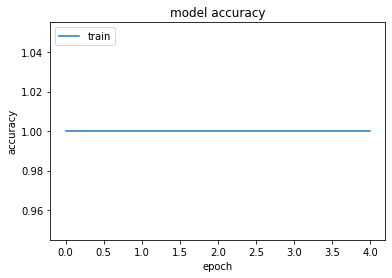

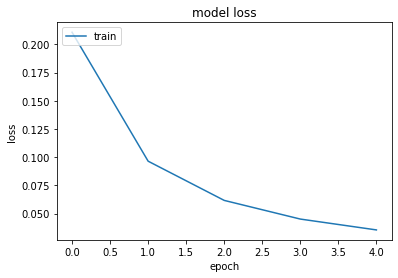

In [319]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [320]:
from sklearn.metrics import classification_report
pred1 = ann.predict(X_test, batch_size=100, verbose=1)
predicted1 = np.argmax(pred1, axis=1)
report1 = classification_report(np.argmax(y_test, axis=1), predicted1)
print(report1)

12/12 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1159

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159



## TF-IDF with NN

In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(corpus).toarray()
vectorizer.get_feature_names_out()
y2 = df.iloc[:, 1].values

In [322]:
X2.shape

(5791, 7163)

In [323]:
y2.shape

(5791,)

In [324]:
random.seed(170204048)

In [325]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [326]:
from tensorflow.keras.utils import to_categorical
y_train2 = to_categorical(y_train2, 2)
y_test2 = to_categorical(y_test2, 2)
y_train2.shape

(4632, 2)

In [327]:
X_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [328]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann2.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
ann2.add(tf.keras.layers.Dense(units=2, activation='softmax'))
ann2.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [329]:
history2 = ann2.fit(X_train2, y_train2, epochs = 5,batch_size=100)

Epoch 1/5
47/47 [==============================] - 1s 10ms/step - loss: 0.4140 - accuracy: 0.8705
Epoch 2/5
47/47 [==============================] - 0s 11ms/step - loss: 0.1301 - accuracy: 1.0000
Epoch 3/5
47/47 [==============================] - 1s 11ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 4/5
47/47 [==============================] - 0s 10ms/step - loss: 0.0518 - accuracy: 1.0000
Epoch 5/5
47/47 [==============================] - 0s 10ms/step - loss: 0.0396 - accuracy: 1.0000


In [330]:
print("Evaluate on test data")
results = ann2.evaluate(X_test2, y_test2, batch_size=100)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 0s 6ms/step - loss: 0.0352 - accuracy: 1.0000
test loss, test acc: [0.03518909215927124, 1.0]


In [331]:
from sklearn.metrics import classification_report
pred2 = ann2.predict(X_test2, batch_size=100, verbose=1)
predicted2 = np.argmax(pred2, axis=1)
report2 = classification_report(np.argmax(y_test2, axis=1), predicted2)
print(report2)

12/12 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1159

    accuracy                           1.00      1159
   macro avg       1.00      1.00      1.00      1159
weighted avg       1.00      1.00      1.00      1159



dict_keys(['loss', 'accuracy'])


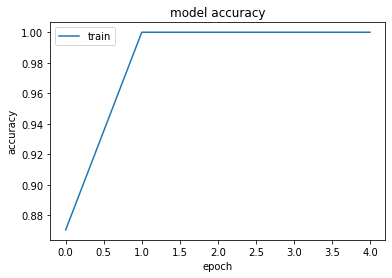

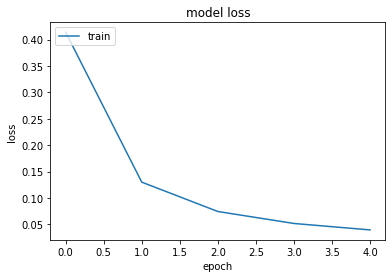

In [332]:
# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##One Hot Encoding with CNN

In [333]:
X3 = df.iloc[:, 0].values
y3 = df.iloc[:, 1].values

In [334]:
X3 = pd.get_dummies(X3)
y3 = pd.get_dummies(y3)

In [335]:
random.seed(170204048)

In [336]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [337]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
y_train3 = sc.fit_transform(y_train3)
y_test3 = sc.fit_transform(y_test3)

In [338]:
X_train3 = np.expand_dims(X_train3, axis=2)

In [339]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(100, 4, activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history3 = cnn.fit(X_train3,y_train3,epochs = 5,batch_size=100)

Epoch 1/5
47/47 [==============================] - 22s 445ms/step - loss: -0.1789 - accuracy: 0.6289
Epoch 2/5
47/47 [==============================] - 21s 443ms/step - loss: -8.9427 - accuracy: 0.9039
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: -31.5780 - accuracy: 0.8864
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: -73.1200 - accuracy: 0.9437
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: -134.6799 - accuracy: 0.9497


In [340]:
print("Evaluate on test data")
results = cnn.evaluate(X_test3, y_test3, batch_size=100)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 2s 147ms/step - loss: -0.5563 - accuracy: 0.6402
test loss, test acc: [-0.5563010573387146, 0.640207052230835]


In [341]:
from sklearn.metrics import classification_report
pred3 = cnn.predict(X_test3, batch_size=100, verbose=1)
predicted3 = np.argmax(pred3, axis=1)
report3 = classification_report(np.argmax(y_test3, axis=1), predicted3)
print(report3)

12/12 [==============================] - 2s 148ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       417
           1       0.64      1.00      0.78       742

    accuracy                           0.64      1159
   macro avg       0.32      0.50      0.39      1159
weighted avg       0.41      0.64      0.50      1159



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dict_keys(['loss', 'accuracy'])


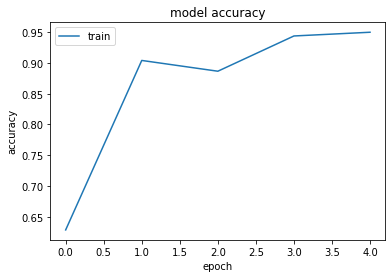

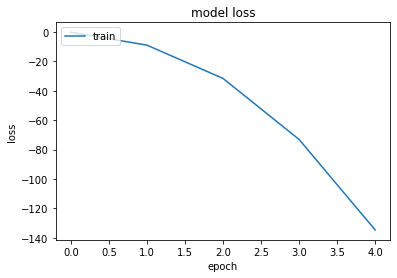

In [342]:
# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()